In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:01<00:00, 183MB/s]
100% 163M/163M [00:01<00:00, 165MB/s]


In [3]:
from zipfile import ZipFile

In [4]:
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [5]:
import os

In [6]:
mask_files = os.listdir('/content/data/with_mask')

In [7]:
len(mask_files)

3725

In [8]:
not_mask_files = os.listdir('/content/data/without_mask')

In [9]:
len(not_mask_files)

3828

In [10]:
mask_label = [1]*3725
not_mask_label = [0]*3828

In [11]:
label = mask_label + not_mask_label

In [12]:
label[0:5]

[1, 1, 1, 1, 1]

In [13]:
label[-5:]

[0, 0, 0, 0, 0]

In [14]:
len(label)

7553

In [15]:
import numpy as np

In [16]:
import cv2

In [17]:
with_image_path = '/content/data/with_mask/'

data = []

for img_path in mask_files:
  image = cv2.imread(with_image_path+img_path)
  image = cv2.resize(image,(128,128))
  data.append(image)

without_image_path = '/content/data/without_mask/'

for img_path in not_mask_files:
  image = cv2.imread(without_image_path+img_path)
  image = cv2.resize(image,(128,128))
  data.append(image)

In [18]:
len(data)

7553

In [19]:
from google.colab.patches import cv2_imshow

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = np.array(data)
y = np.array(label)

In [22]:
y[-5:]

array([0, 0, 0, 0, 0])

In [23]:
y[:5]

array([1, 1, 1, 1, 1])

In [24]:
X.shape

(7553, 128, 128, 3)

In [25]:
y.shape

(7553,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [27]:
print(X_train.shape, X_test.shape)

(5664, 128, 128, 3) (1889, 128, 128, 3)


In [28]:
X_train_scaled, X_test_scaled = X_train/255, X_test/255

In [29]:
print(X_train.shape, X_test.shape)

(5664, 128, 128, 3) (1889, 128, 128, 3)


In [30]:
from tensorflow.keras import layers, models

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [43]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
160/160 [==============================] - 162s 1s/step - loss: 0.0552 - accuracy: 0.9804 - val_loss: 0.1203 - val_accuracy: 0.9665
Epoch 2/5
160/160 [==============================] - 163s 1s/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 0.1447 - val_accuracy: 0.9612
Epoch 3/5
160/160 [==============================] - 169s 1s/step - loss: 0.0624 - accuracy: 0.9784 - val_loss: 0.1004 - val_accuracy: 0.9612
Epoch 4/5
160/160 [==============================] - 167s 1s/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0899 - val_accuracy: 0.9683
Epoch 5/5
160/160 [==============================] - 166s 1s/step - loss: 0.0329 - accuracy: 0.9880 - val_loss: 0.2137 - val_accuracy: 0.9612


In [44]:
model.evaluate(X_test_scaled,y_test)

60/60 [==============================] - 17s 282ms/step - loss: 0.1891 - accuracy: 0.9672


[0.18907026946544647, 0.9671784043312073]

In [58]:
import pickle

In [59]:
pickle.dump(model,open('maskie_model.pkl','wb'))

In [45]:
import cv2

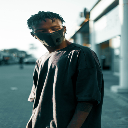

1/1 [==============================] - 0s 27ms/step
Score : 0.9999995
With Mask


In [65]:
img_path = 'untitled-design-1-1.png'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

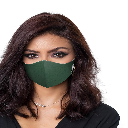

1/1 [==============================] - 0s 44ms/step
Score : 1.0
With Mask


In [66]:
img_path = 'Mas.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

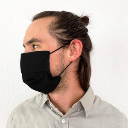

1/1 [==============================] - 0s 28ms/step
Score : 1.0
With Mask


In [67]:
img_path = 'black.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

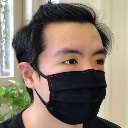

1/1 [==============================] - 0s 28ms/step
Score : 1.0
With Mask


In [68]:
img_path = 'img.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

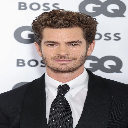

1/1 [==============================] - 0s 30ms/step
Score : 0.9999999851078893
Without Mask


In [69]:
img_path = 'andrew.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

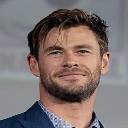

1/1 [==============================] - 0s 29ms/step
Score : 0.9999999999364476
Without Mask


In [74]:
img_path = 'chrishem.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

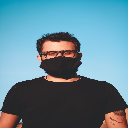

1/1 [==============================] - 0s 27ms/step
Score : 1.0
With Mask


In [71]:
img_path = 'mg.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

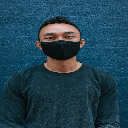

1/1 [==============================] - 0s 28ms/step
Score : 1.0
With Mask


In [72]:
img_path = 'mg2.jpeg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')

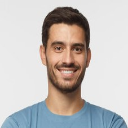

1/1 [==============================] - 0s 29ms/step
Score : 0.9999995284484271
Without Mask


In [73]:
img_path = 'Manhh.jpg'
img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
cv2_imshow(img)
img = img/255
img = np.reshape(img,[1,128,128,3])
pred = model.predict(img)
if pred > 0.5:
  print('Score :',pred[0][0])
  print('With Mask')
else:
  print('Score :',1-pred[0][0])
  print('Without Mask')